In [2]:
#Importação de bibliotecas

import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
#Acesso ao google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Acesso aos dados das ferrovias

data = pd.ExcelFile('/content/drive/My Drive/Dados/tkuano.xlsx')

In [5]:
pd.set_option('display.max_rows', 10)

In [6]:
rail = pd.read_excel(data)

In [7]:
rail

,ANO,TKU
0,2011,1025742085
1,2012,1354131084
2,2013,1254507665
3,2014,1255090874
4,2015,972508791
...,...,...
7,2018,166363736
8,2019,147612635
9,2020,86897520
10,2021,98013609


In [10]:

data2 = pd.ExcelFile('/content/drive/My Drive/Dados/txcamb.xlsx')
rail2= pd.read_excel(data2)

In [ ]:
ANL = pd.concat([rail,rail2], axis=1)

In [ ]:
ANL

,ANO,TKU,ano,taxa de cambio
0,2011,1025742085,2011,1.6750
1,2012,1354131084,2012,1.9546
2,2013,1254507665,2013,2.1576
3,2014,1255090874,2014,2.3534
4,2015,972508791,2015,3.3315
...,...,...,...,...
7,2018,166363736,2018,3.6542
8,2019,147612635,2019,3.9451
9,2020,86897520,2020,5.1558
10,2021,98013609,2021,5.3950


In [ ]:
ANL.to_excel('/content/drive/My Drive/Dados/ANL.xlsx')

In [ ]:
ANL.corr(method= 'pearson')

,ANO,TKU,ano,taxa de cambio
ANO,1.000000,-0.897976,1.000000,0.968331
TKU,-0.897976,1.000000,-0.897976,-0.853675
ano,1.000000,-0.897976,1.000000,0.968331
taxa de cambio,0.968331,-0.853675,0.968331,1.000000


In [ ]:
y = ANL['TKU']
xn = ANL['taxa de cambio']
x = sm.add_constant(xn)

In [ ]:
regression = sm.OLS(y,x)
results = regression.fit()

                            OLS Regression Results                            
Dep. Variable:                    TKU   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     26.87
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           0.000411
Time:                        00:51:22   Log-Likelihood:                -249.63
No. Observations:                  12   AIC:                             503.3
Df Residuals:                      10   BIC:                             504.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             1.8e+09   2.46e+08      7.

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'TKU')

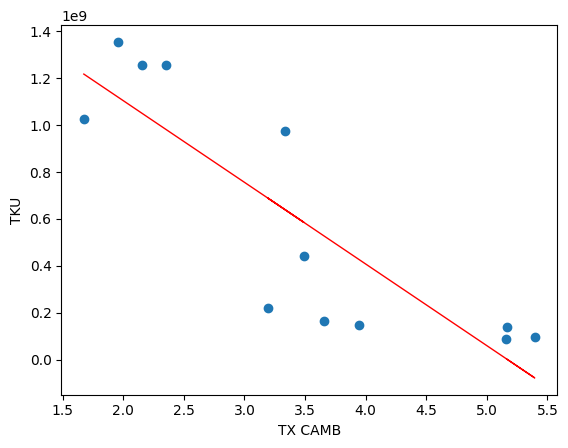

In [ ]:
plt.scatter(xn,y)
yhat = -3.48e+08*xn + 1.8e+09
fig = plt.plot(xn, yhat, lw=1, c= 'red', label= 'regression line')
plt.xlabel ('TX CAMB', fontsize=10)
plt.ylabel('TKU', fontsize=10)
